In [49]:
# import packages for this example
import pandas as pd    
from collections import OrderedDict  # to create DataFrame with ordered columns
# special plotting methods
from pandas.tools.plotting import scatter_matrix    
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics  # for silhouette coefficient

In [50]:
import pandas as pd      
import numpy as np   
import matplotlib.pyplot as plt   
from sklearn.decomposition import PCA, FactorAnalysis
import statsmodels.formula.api as smf  

In [51]:
food_df = pd.read_csv('AMES_TRAIN_2.csv')

In [20]:
cdata = food_df 
corr = cdata[cdata.columns].corr()
print(corr)

              SubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
SubClass      1.000000    -0.441588 -0.256396     0.075424    -0.100556   
LotFrontage  -0.441588     1.000000  0.466483     0.210665    -0.073117   
LotArea      -0.256396     0.466483  1.000000     0.131023    -0.055103   
OverallQual   0.075424     0.210665  0.131023     1.000000    -0.164795   
OverallCond  -0.100556    -0.073117 -0.055103    -0.164795     1.000000   
YearBuilt     0.084075     0.114053  0.044971     0.607942    -0.448619   
TotalBsmtSF  -0.211146     0.385795  0.274295     0.568596    -0.226467   
FirstFlrSF   -0.245942     0.480243  0.363737     0.501978    -0.188090   
SecondFlrSF   0.323144     0.007786  0.026355     0.225203    -0.000460   
LowQualFinSF  0.017217    -0.007550  0.010335    -0.033202     0.045998   
GrLivArea     0.074095     0.391865  0.315260     0.589059    -0.147699   
Fireplaces   -0.034399     0.276692  0.233613     0.406057    -0.058747   
GarageYrBlt   0.089603   

In [21]:
pca_data = food_df.loc[:,['SubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','TotalBsmtSF','FirstFlrSF','SecondFlrSF','LowQualFinSF','GrLivArea','Fireplaces','GarageYrBlt','GarageCars','GarageArea','YrSold','SalePrice']] 
pca = PCA()
P = pca.fit(pca_data)

In [22]:
np.set_printoptions(threshold=np.inf) 
np.around([pca.components_], decimals=3)

array([[[-0.   ,  0.   ,  0.025,  0.   , -0.   ,  0.   ,  0.003,  0.003,
          0.001, -0.   ,  0.004,  0.   ,  0.   ,  0.   ,  0.002, -0.   ,
          1.   ],
        [-0.001,  0.001,  1.   , -0.   , -0.   , -0.001,  0.006,  0.01 ,
         -0.003,  0.   ,  0.008,  0.   , -0.001, -0.   ,  0.001, -0.   ,
         -0.026],
        [ 0.026, -0.004,  0.005,  0.   ,  0.   , -0.009, -0.424, -0.352,
          0.736,  0.006,  0.39 ,  0.   , -0.005, -0.   , -0.039, -0.   ,
          0.   ],
        [ 0.003,  0.014, -0.013,  0.   , -0.   , -0.007,  0.503,  0.499,
          0.172,  0.008,  0.68 ,  0.   , -0.006,  0.   ,  0.069, -0.   ,
         -0.006],
        [-0.009,  0.009, -0.004, -0.001,  0.   , -0.02 , -0.75 ,  0.532,
         -0.307,  0.017,  0.243,  0.   , -0.014, -0.   , -0.013, -0.   ,
          0.   ],
        [ 0.001,  0.021,  0.   ,  0.   , -0.001,  0.041, -0.062, -0.04 ,
          0.013, -0.   , -0.027, -0.   ,  0.064,  0.003,  0.994, -0.   ,
         -0.001],
        [-0.034,

In [23]:
pca_explained_variance = pca.explained_variance_ratio_
print('Proportion of variance explained:', pca_explained_variance)

Proportion of variance explained: [9.93176092e-01 6.75112852e-03 4.08979289e-05 2.23381815e-05
 5.80052280e-06 3.02095990e-06 3.27299345e-07 2.25362134e-07
 1.11095018e-07 3.97291300e-08 1.78912957e-08 2.50383420e-10
 1.24768511e-10 8.07593009e-11 4.07169010e-11 1.50793892e-11
 2.05815672e-36]


In [24]:
pca_data_cormat = np.corrcoef(pca_data.T)
eigenvalues, eigenvectors = np.linalg.eig(pca_data_cormat)
np.around([eigenvalues], decimals=3)

array([[ 6.106,  2.119,  1.795,  1.026,  0.964,  0.994,  0.862,  0.636,
         0.621,  0.566,  0.403,  0.289,  0.2  ,  0.121,  0.144,  0.154,
        -0.   ]])

In [25]:
print('Linear algebra demonstration: Proportion of variance explained: ',
    eigenvalues/eigenvalues.sum())
np.around([eigenvectors], decimals=3)

Linear algebra demonstration: Proportion of variance explained:  [ 3.59161427e-01  1.24647845e-01  1.05583547e-01  6.03377120e-02
  5.66827188e-02  5.84835897e-02  5.06826105e-02  3.74205357e-02
  3.65587990e-02  3.33086383e-02  2.37304205e-02  1.70166941e-02
  1.17513278e-02  7.09646602e-03  8.47982159e-03  9.05784746e-03
 -2.99544697e-17]


array([[[-0.04 , -0.489, -0.2  ,  0.025, -0.197, -0.012,  0.264,  0.324,
         -0.385,  0.307,  0.489,  0.102, -0.006,  0.045,  0.103, -0.028,
         -0.   ],
        [ 0.199,  0.405, -0.062, -0.168,  0.332, -0.014, -0.053, -0.02 ,
          0.231, -0.059,  0.737,  0.194, -0.022,  0.1  ,  0.05 ,  0.003,
         -0.   ],
        [ 0.148,  0.354, -0.124, -0.245,  0.316, -0.03 ,  0.178, -0.181,
         -0.73 ,  0.174, -0.203,  0.054, -0.047, -0.021, -0.047,  0.015,
         -0.   ],
        [ 0.327, -0.156, -0.07 ,  0.156, -0.189, -0.061, -0.106, -0.174,
         -0.08 , -0.218, -0.031,  0.653,  0.061, -0.087, -0.34 ,  0.388,
         -0.   ],
        [-0.138,  0.197, -0.223,  0.361, -0.237, -0.073, -0.696, -0.119,
         -0.307,  0.058,  0.209, -0.196, -0.06 , -0.074, -0.054, -0.099,
          0.   ],
        [ 0.274, -0.298,  0.288, -0.043,  0.068, -0.049,  0.04 , -0.361,
         -0.082, -0.156,  0.191, -0.124,  0.019, -0.506, -0.119, -0.508,
          0.   ],
        [ 0.308,

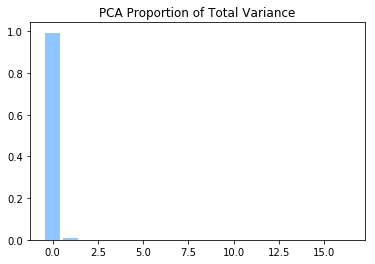

In [26]:
plt.bar(np.arange(len(pca_explained_variance)), pca_explained_variance, 
    color = 'dodgerblue', alpha = 0.5, align = 'center')
plt.title('PCA Proportion of Total Variance')
plt.show()

   eigenvalues  0
0     6.105744  1
1     2.119013  2
2     1.794920  3
3     1.025741  4
4     0.963606  5
5     0.994221  6
6     0.861604  7
7     0.636149  8
8     0.621500  9


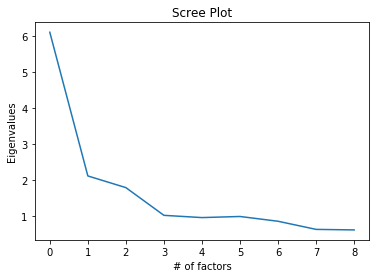

In [27]:
d = {'eigenvalues': eigenvalues }
df1 = pd.DataFrame(data=d)
df2 =pd.Series([1,2,3,4,5,6,7,8,9])
#df2 = {'factors': factors}
# merge eigenvalues with # of factors
result = pd.concat([df1, df2], axis=1, join_axes=[df2.index])
print (result)

def scat(dataframe,var1,var2):
    dataframe[var2].plot()     
    plt.title('Scree Plot')
    plt.xlabel('# of factors')
    plt.ylabel('Eigenvalues')
    
scat(result,'0','eigenvalues')
plt.show()

In [28]:
    pca_loadings = pca.components_.T


In [33]:
np.set_printoptions(precision = 3, suppress = True,
    formatter={'float': '{: 0.3f}'.format})
print(pca_loadings[:,0:3])

[[-0.000 -0.001  0.026]
 [ 0.000  0.001 -0.004]
 [ 0.025  1.000  0.005]
 [ 0.000 -0.000  0.000]
 [-0.000 -0.000  0.000]
 [ 0.000 -0.001 -0.009]
 [ 0.003  0.006 -0.424]
 [ 0.003  0.010 -0.352]
 [ 0.001 -0.003  0.736]
 [-0.000  0.000  0.006]
 [ 0.004  0.008  0.390]
 [ 0.000  0.000  0.000]
 [ 0.000 -0.001 -0.005]
 [ 0.000 -0.000 -0.000]
 [ 0.002  0.001 -0.039]
 [-0.000 -0.000 -0.000]
 [ 1.000 -0.026  0.000]]


In [30]:
C = pca.transform(pca_data)


In [31]:
pca_data['pca1'] = C[:,0]
pca_data['pca2'] = C[:,1]
pca_data['pca3'] = C[:,2]

In [32]:
food_df['pca1'] = C[:,0]
food_df['pca2'] = C[:,1]
food_df['pca3'] = C[:,2]
print(food_df)

      SubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60           70     8304            6            5       1997   
1           45           58     6380            5            6       1922   
2           20           91    11375            6            5       1954   
3           30           55     7111            5            7       1928   
4           70           60    11340            2            1       1920   
5          120           53     4043            6            6       1977   
6           60           84    10728            8            5       2006   
7          160           24     2308            6            5       1974   
8           80           62     7706            6            5       1993   
9           50           50     5000            5            7       1941   
10          70          144    21384            5            6       1923   
11         160           21     2058            6            5       1973   

In [34]:
pca_scores = pca_data.loc[:,['pca1','pca2', 'pca3']]
pca_model_cormat = \
    np.corrcoef(pca_scores.as_matrix().transpose()).round(decimals=3)
print(pca_model_cormat)

[[ 1.000 -0.000 -0.000]
 [-0.000  1.000  0.000]
 [-0.000  0.000  1.000]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
model3_fit = smf.ols(formula = 'SalePrice~pca1', data = food_df).fit()

In [40]:
model3_df = pd.DataFrame({'R2_Adj':model3_fit.rsquared_adj,
                        'Prob (F-Stat)':model3_fit.f_pvalue,
                        'AIC':model3_fit.aic,                         
                        'F-Value': model3_fit.fvalue,
                        'BIC':model3_fit.bic}, index = ['model3'])

In [46]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.606e+08
Date:                Sun, 10 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:23:46   Log-Likelihood:                -10513.
No. Observations:                1598   AIC:                         2.103e+04
Df Residuals:                    1596   BIC:                         2.104e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.837e+05      4.359   4.21e+04      0.000    1.84e+05    1.84e+05
pca1           0.9997   5.26e-05    1.9e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                     3347.339   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14550028.226
Skew:                         -17.069   Prob(JB):                         0.00
Kurtosis:                     469.217   Cond. No.                     8.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
test_predictions_1 = model3_fit.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

NameError: name 'test' is not defined